<a href="https://colab.research.google.com/github/tomafischer/ai_geeks/blob/main/statistics/Distributions_Descriptive_snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian - Normal Distribution
[Wiki documentation ](https://en.wikipedia.org/wiki/Normal_distribution)  -  [SciPy Stats docu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2 }
$
where
>$\mu$ as mean  
>$\sigma$ standard divation  









In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Paramters: loc = 1, scale = 2 =>
mean: 1.0, variance: 4.0, skew:0.0, kurtosis: 0.0
sum(hy_density) = 39.76096464217779


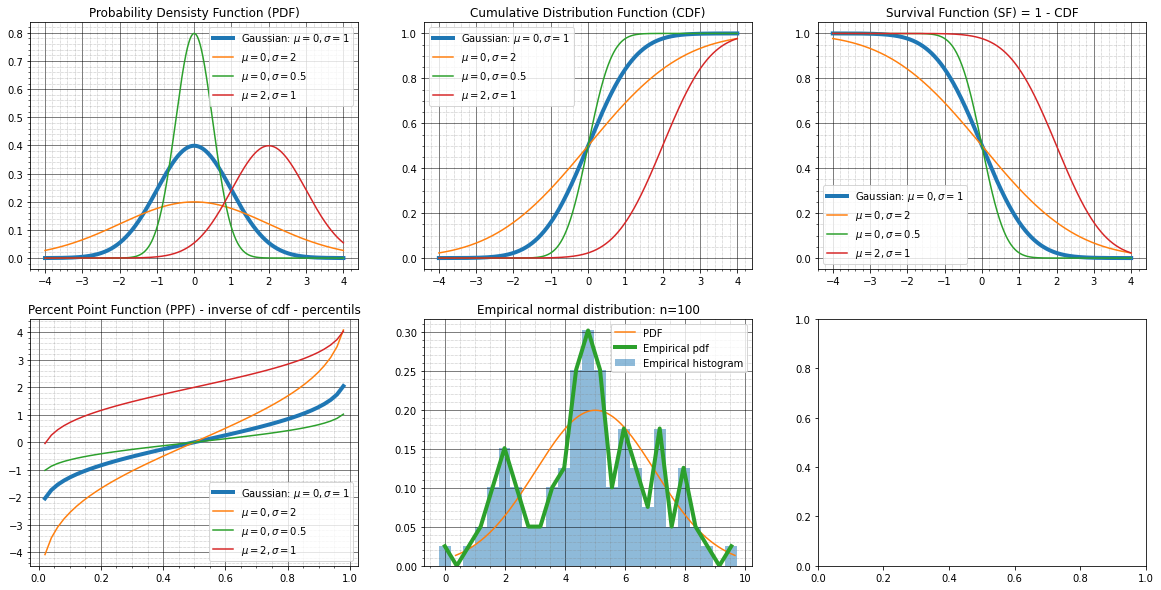

In [108]:
# number of discretizations
N= 1001
x = np.linspace(-4,4,N)
gausdist = stats.norm.pdf(x)

# printing the four momemtums
# The location (loc) keyword specifies the mean. 
# The scale (scale) keyword specifies the standard deviation.
mean, var, skew, kurt = stats.norm.stats(moments='mvsk', scale=2, loc =1)
print(f"Paramters: loc = 1, scale = 2 =>\nmean: {mean}, variance: {var}, skew:{skew}, kurtosis: {kurt}")

fig, axs = plt.subplots(2,3, figsize=(20,10))
#### first plot - PDFs
ax = axs[0][0]

ax.set_title("Probability Densisty Function (PDF)")
ax.plot(x,gausdist, linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.pdf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.pdf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.pdf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

### second plot - CDFs
ax = axs[0][1]

ax.set_title("Cumulative Distribution Function (CDF)")
ax.plot(x,stats.norm.cdf(x), linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.cdf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.cdf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.cdf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

### second plot - Survival Function (SF)
ax = axs[0][2]

ax.set_title("Survival Function (SF) = 1 - CDF")
ax.plot(x,stats.norm.sf(x), linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.sf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.sf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.sf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

### third plot - PPF Percent Point Function (PPF)
ax = axs[1][0]
x = np.linspace(0,1,50)
ax.set_title("Percent Point Function (PPF) - inverse of cdf - percentils")
ax.plot(x,stats.norm.ppf(x), linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.ppf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.ppf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.plot(x, stats.norm.ppf(x, loc=2, scale =1), label ="$\mu =2, \sigma = 1$ ")
ax.legend()
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')



######
#.      Empirical
######
n = 100 # Sample size
stretch = 2 # standard diviation
shift = 5 # mean
bins = 25
data = stretch * np.random.randn(n) + shift

x = np.linspace(stats.norm.ppf(0.01,loc = shift, scale = stretch), 
                stats.norm.ppf(0.99,loc = shift, scale = stretch), 
                200)


ax = axs[1][1]
ax.set_title(f"Empirical normal distribution: n={n}")
#default histogram
ax.hist(data, bins=bins, label="Empirical histogram", density=True, alpha= 0.5 )
#overlaying the actual pdf
ax.plot(x, stats.norm.pdf(x, loc = shift, scale = stretch), label = "PDF")
#overalying empircal pdf
hy, hx = np.histogram(data, bins = bins)
hxx = (hx[1:] + hx[:-1]) / 2
# calculating the density : y  = y / (sum(y) * width of bin)
hy_density = hy / (np.sum(hy) * np.diff(hx))
print(f"sum(hy_density) = {np.sum(hy * np.diff(hx))}")
ax.plot(hxx, hy_density, label ="Empirical pdf", linewidth=4) 

ax.legend()
ax.grid(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()

sum(hy) = 1.0


array([0.51014783, 0.51014783, 0.51014783, 0.51014783, 0.51014783,
       0.51014783, 0.51014783, 0.51014783, 0.51014783, 0.51014783,
       0.51014783, 0.51014783, 0.51014783, 0.51014783, 0.51014783,
       0.51014783, 0.51014783, 0.51014783, 0.51014783, 0.51014783,
       0.51014783, 0.51014783, 0.51014783, 0.51014783, 0.51014783])

array([-0.99086769, -0.48071986,  0.02942798,  0.53957581,  1.04972364,
        1.55987147,  2.07001931,  2.58016714,  3.09031497,  3.60046281,
        4.11061064,  4.62075847,  5.1309063 ,  5.64105414,  6.15120197,
        6.6613498 ,  7.17149763,  7.68164547,  8.1917933 ,  8.70194113,
        9.21208897,  9.7222368 , 10.23238463, 10.74253246, 11.2526803 ,
       11.76282813])

In [40]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk', scale=2, loc =1)
print(f"mean: {mean}, variance: {var}, skew:{skew}, kurtosis: {kurt}")

mean: 1.0, variance: 4.0, skew:0.0, kurtosis: 0.0
